# Plots

Gráficos que ajudam entender o histórico e identificar a distribuição de ações.

In [ ]:
# Data Handling and Analysis
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
import StockDataProcessor

# Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
import warnings
warnings.filterwarnings("ignore")

# Configuração dos gráficos
from matplotlib import rc

# Estilo dos gráficos
# Referência: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('Solarize_Light2')
%config InlineBackend.figure_format = 'retina'  # Formato das imagens

# Configurações de fontes
rc('font', **{"family":"sans-serif","sans-serif":["DejaVu Sans"], "size":9})
rc('mathtext', **{"default":"regular"})

%matplotlib inline

In [ ]:
# Define the date range
start_date = date.today() - timedelta(days=1825)
end_date = date.today()

# List of stocks and corresponding company names
stocks = ['POMO4.SA', 'WEGE3.SA', 'PETR4.SA', 'BTLG11.SA', 'MGLU3.SA', 'B3SA3.SA']
company_names = ["Marcopolo", "Weg", "Petrobras", "BTG logística","Magalu", "Bovespa"]

# Initialize the processor
processor = StockDataProcessor.StockDataProcessor(stocks, company_names, start_date, end_date)

# Process all stocks
processor.process_all_stocks()

# Combine all price data
processor.combine_all_price_data()

df_adj_close = processor.combined_data['Adj Close']
df_adj_close = df_adj_close.set_index('Date')
df_adj_close


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df_adj_close.describe().round(3)

Price,Marcopolo,Weg,Petrobras,BTG logística,Magalu,Bovespa
count,1242.000,1242.000,1242.000,1242.000,1242.000,1242.000
mean,3.688,33.668,18.190,86.020,86.896,12.750
std,1.940,8.488,10.466,7.151,77.336,2.053
min,1.767,12.388,3.906,58.948,8.860,8.372
25%,2.277,29.773,9.755,80.986,23.757,11.047
50%,2.522,34.283,14.825,84.344,42.744,12.357
75%,5.153,37.871,27.095,91.058,155.334,14.030
max,9.590,57.190,39.600,104.315,256.293,18.734


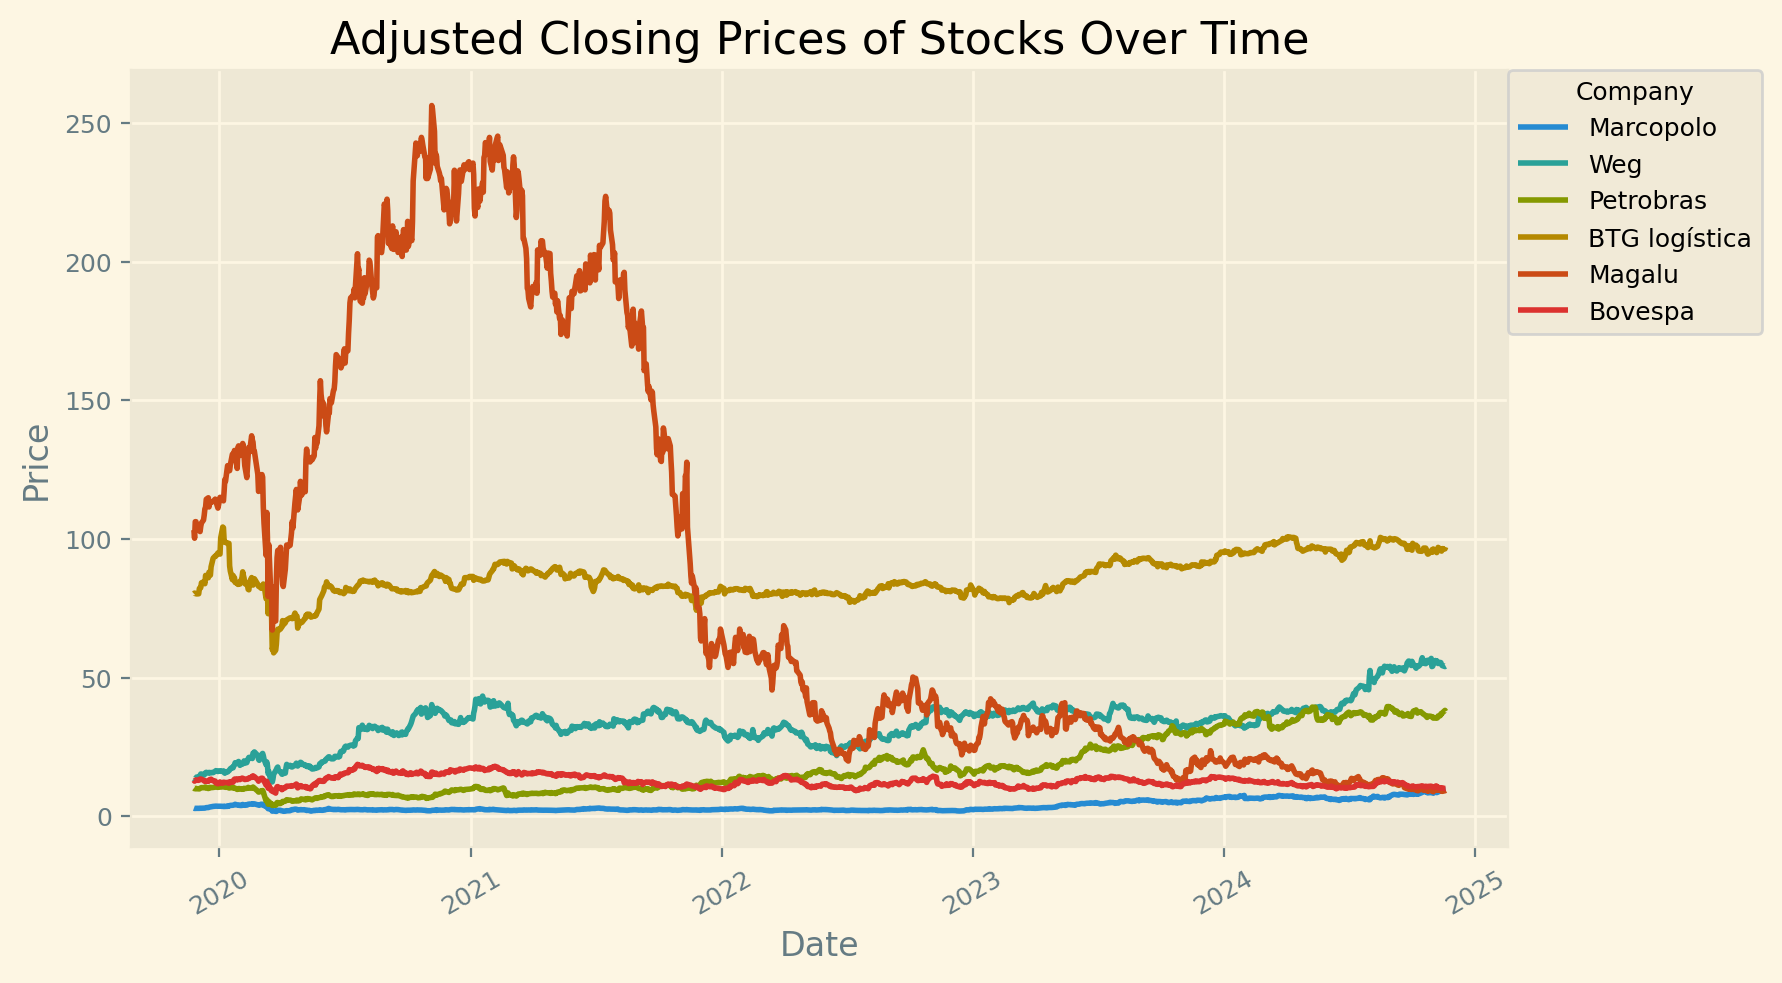

In [6]:
def plot_closing_prices(df_adj_close, title='Adjusted Closing Prices of Stocks Over Time', figsize=(9, 5)):
    """
    Function to plot adjusted closing prices of stocks over time for a given DataFrame.
    
    Parameters:
    - df_adj_close (pd.DataFrame): The DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - title (str): The title of the plot.
    - figsize (tuple): The size of the figure (width, height).
    """
    # Set the figure size
    plt.figure(figsize=figsize)
    # Plot each company's adjusted closing prices
    for column in df_adj_close.columns[:]:
        plt.plot(df_adj_close.index, df_adj_close[column], label=column)

    # Customize the plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Show legend
    plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

    # Add grid, rotate x-axis labels, and adjust layout
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_closing_prices(df_adj_close)

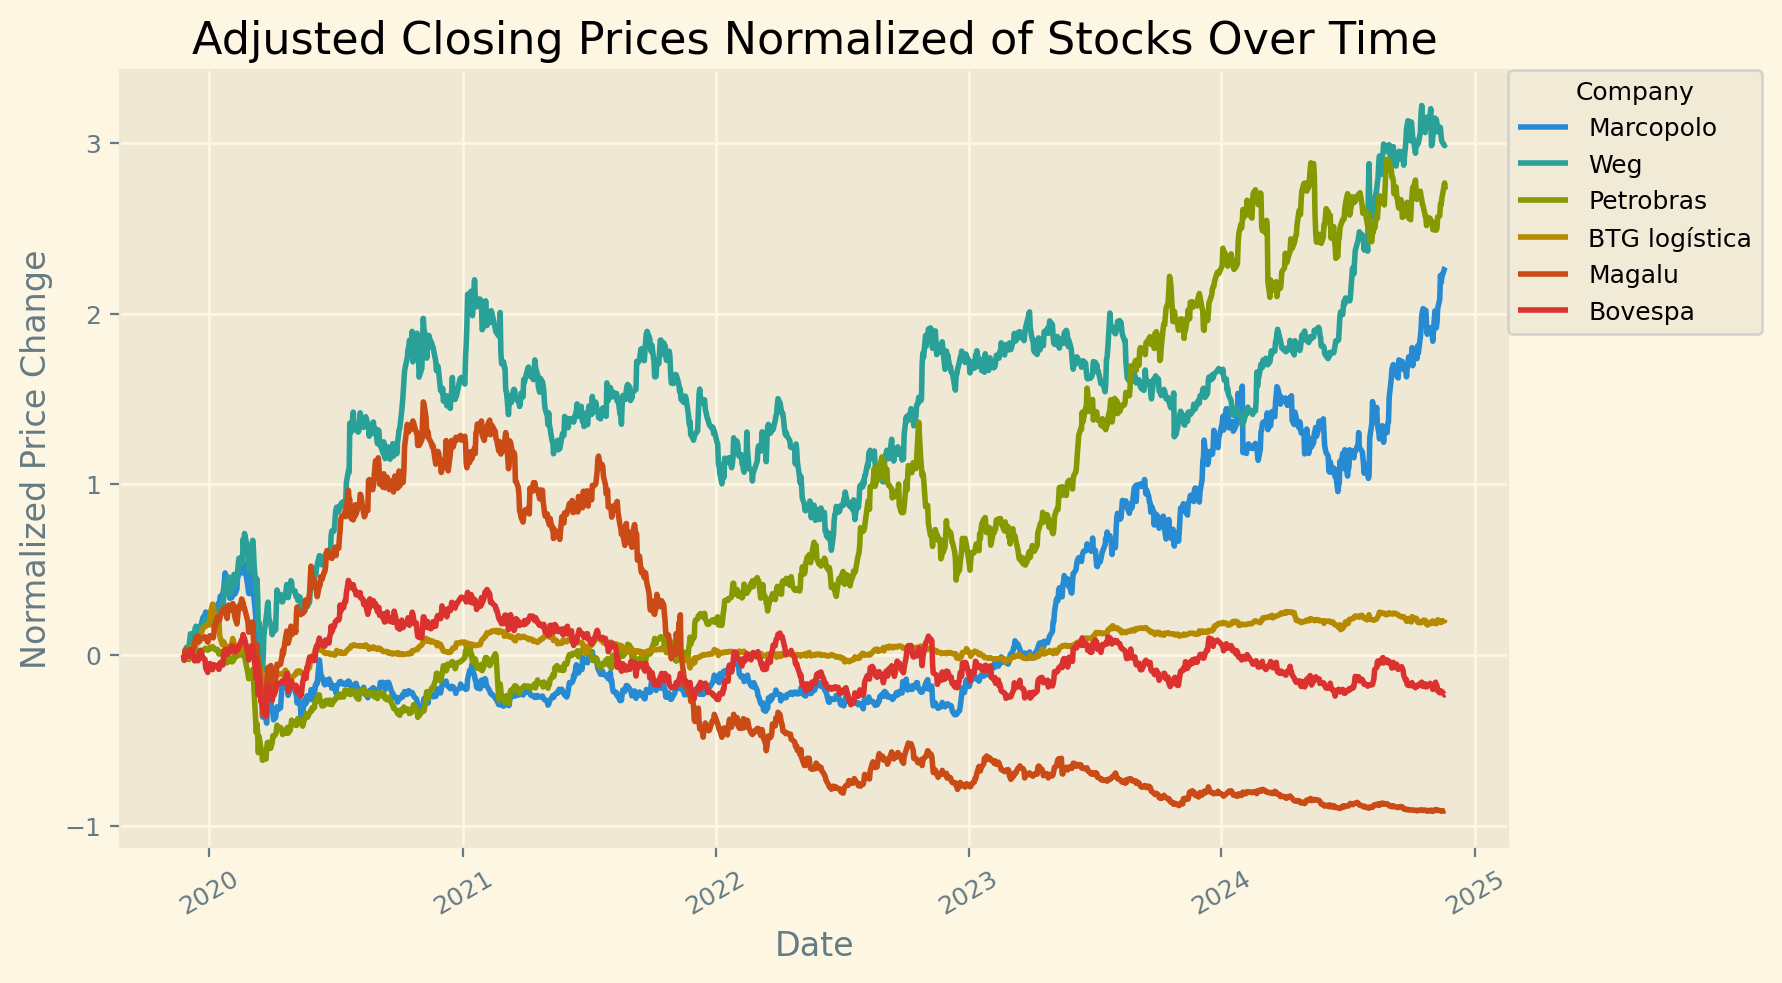

In [7]:
def plot_adjusted_closing_prices_normalized(df_adj_close, title='Adjusted Closing Prices Normalized of Stocks Over Time', figsize=(9, 5)):
    """
    Function to plot normalized adjusted closing prices of stocks over time for a given DataFrame.
    
    Parameters:
    - df_adj_close (pd.DataFrame): The DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - title (str): The title of the plot.
    - figsize (tuple): The size of the figure (width, height).
    """

    # Normalize the data by company
    df_adj_close_normalized = df_adj_close.copy()
    for column in df_adj_close_normalized.columns:
        df_adj_close_normalized[column] = (df_adj_close_normalized[column] / df_adj_close_normalized[column].iloc[0]) - 1

    # Set the figure size
    plt.figure(figsize=figsize)

    # Plot each company's normalized adjusted closing prices
    for column in df_adj_close_normalized.columns:
        plt.plot(df_adj_close_normalized.index, df_adj_close_normalized[column], label=column)

    # Customize the plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized Price Change')

    # Show legend
    plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

    # Add grid, rotate x-axis labels, and adjust layout
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot the normalized data
plot_adjusted_closing_prices_normalized(df_adj_close)


## Médias Móveis


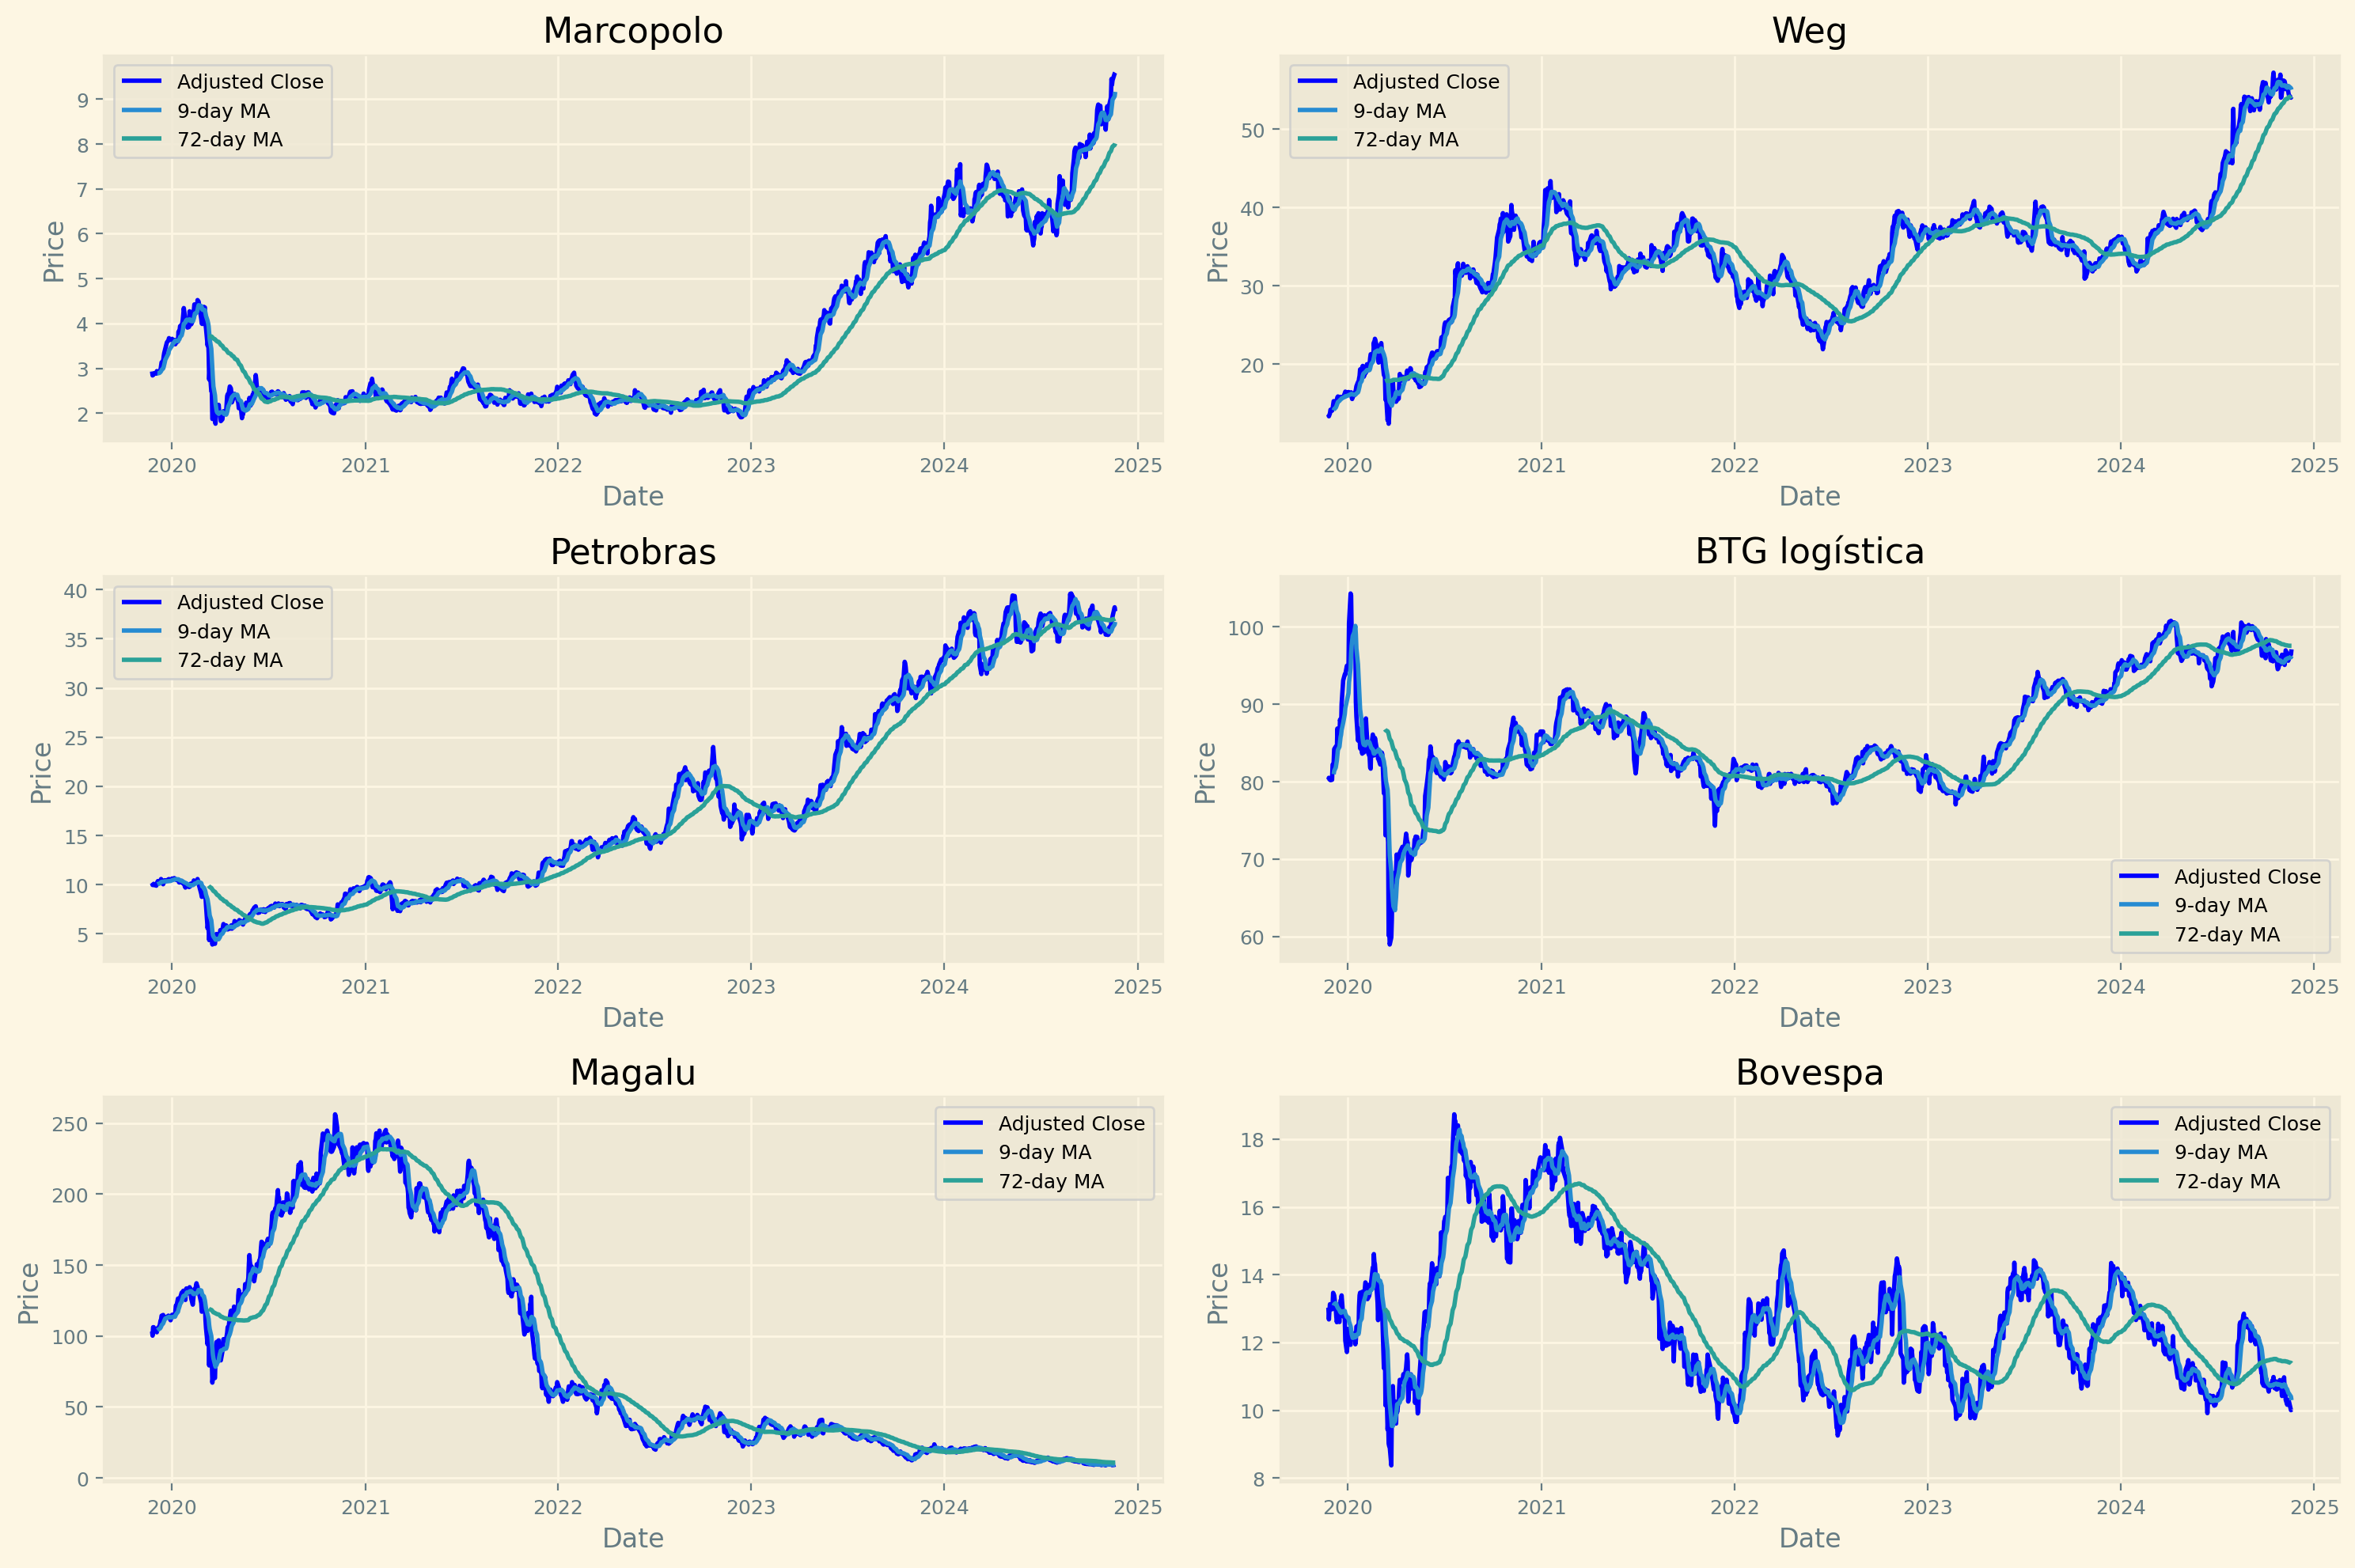

In [12]:
def calculate_and_plot_moving_averages(df_adj_close, company_names, ma_days=[9, 72], figsize=(15, 10)):
    """
    Function to calculate moving averages and plot them along with Adjusted Close prices.

    Parameters:
    - df_adj_close (pd.DataFrame): DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - company_names (list): List of company names to plot.
    - ma_days (list): List of moving average periods.
    - figsize (tuple): Size of the figure (width, height).
    """
    company_data = df_adj_close.copy()

    # Remove 'Carteira' from the company names list (if it exists)
    company_names = [company for company in company_names if company != 'Carteira']

    # Calculate the number of subplots required
    num_companies = len(company_names)
    
    # Determine the number of rows and columns for subplots
    num_cols = 2
    num_rows = (num_companies + num_cols - 1) // num_cols  # This ensures enough rows for all plots
    
    # Create subplots dynamically
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten to make it easier to iterate over

    # Plot Adjusted Close and Moving Averages for each company
    for i, company in enumerate(company_names):
        ax = axes[i]  # Determine the subplot position
        
        # Plot Adjusted Close price
        ax.plot(company_data.index, company_data[company], label='Adjusted Close', color='blue')
        
        # Plot each moving average
        for ma in ma_days:
            ma_column = f"MA for {ma} days"
            company_data[ma_column] = company_data[company].rolling(ma).mean()
            ax.plot(company_data.index, company_data[ma_column], label=f"{ma}-day MA")
        
        # Customize the plot
        ax.set_title(company)
        ax.set_ylabel('Price')
        ax.set_xlabel('Date')
        ax.legend()
        ax.grid(True)

    # Hide any unused axes (if the number of companies doesn't perfectly fit the grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to avoid overlap
    fig.tight_layout()

    # Show the plot
    plt.show()

# Example usage
calculate_and_plot_moving_averages(df_adj_close, company_names)


## Densidade

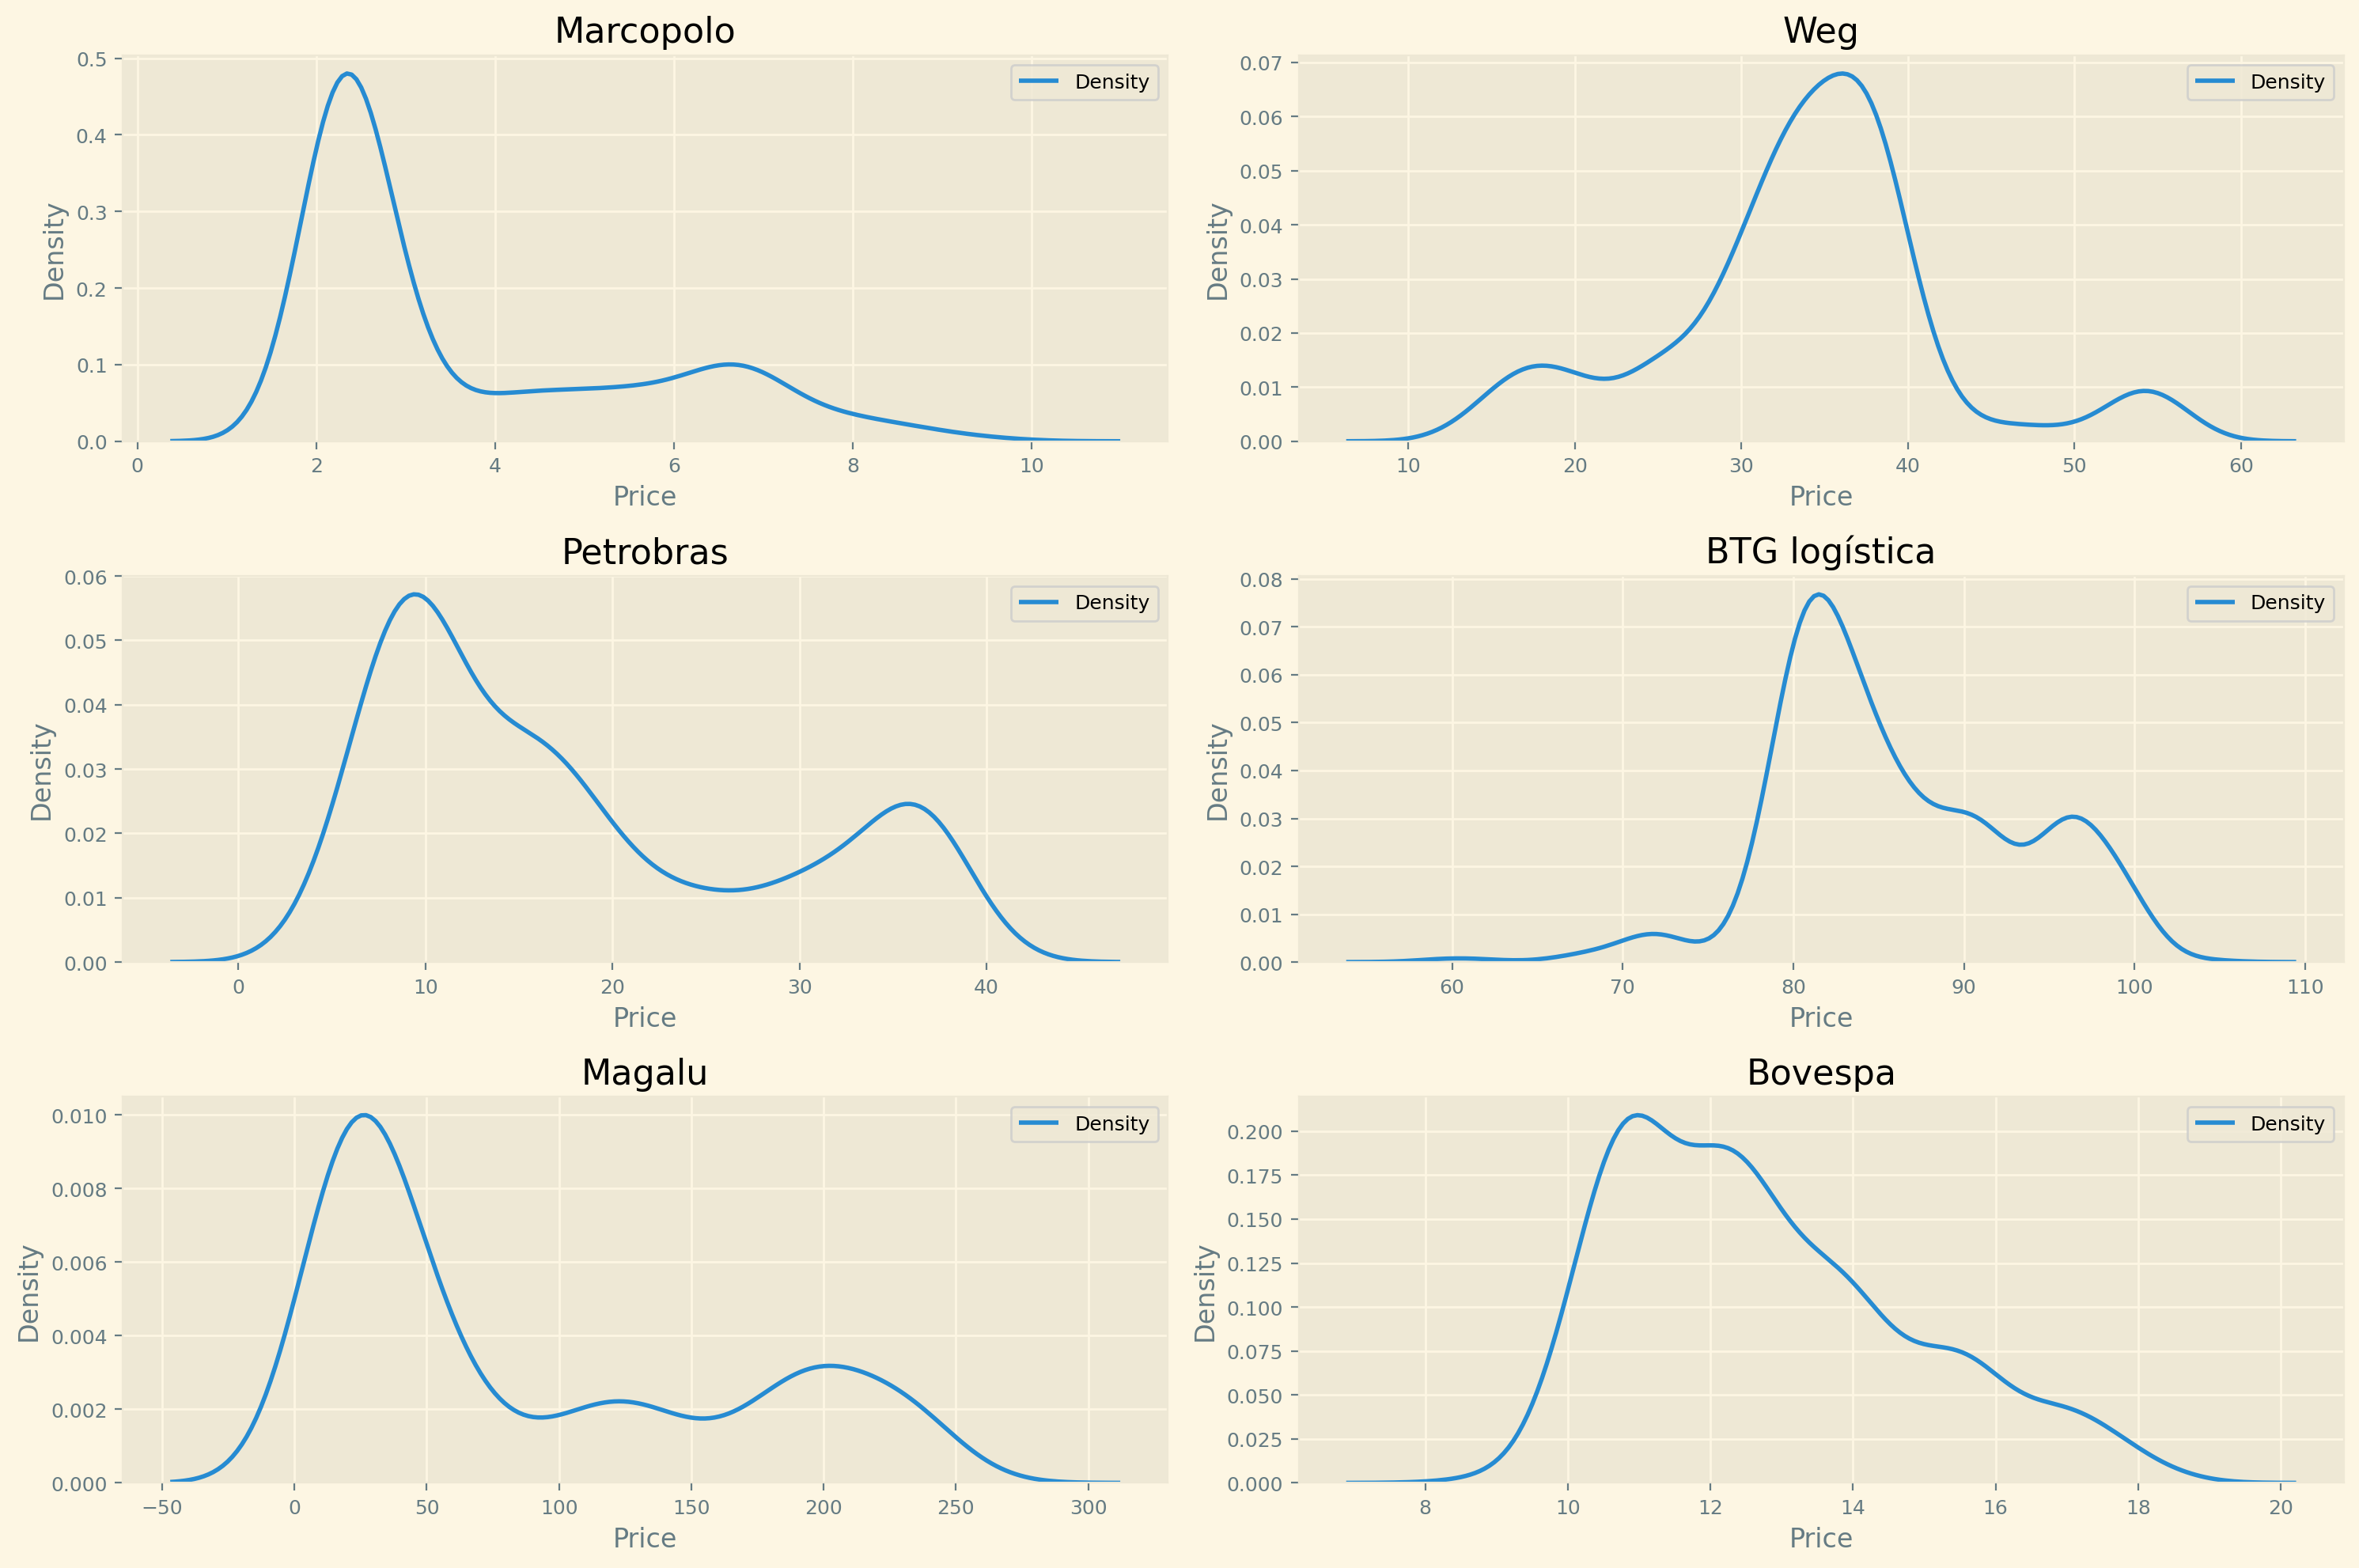

In [13]:
def plot_density(df_adj_close, company_names, figsize=(15, 10)):
    """
    Function to calculate and plot the density of Adjusted Close prices.

    Parameters:
    - df_adj_close (pd.DataFrame): DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - company_names (list): List of company names to plot.
    - figsize (tuple): Size of the figure (width, height).
    """
    company_data = df_adj_close.copy()

    # Configurar subplots dinamicamente
    num_companies = len(company_names)  # Use only the companies in company_names, without 'Carteira'
    num_rows = (num_companies + 1) // 2  # This ensures enough rows for all subplots
    num_cols = 2  # We want two columns

    # Create subplots dynamically
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten to make it easier to iterate over

    # Plot density for each company
    for i, company in enumerate(company_names):
        ax = axes[i]  # Determine the subplot position
        
        # Plot density
        sns.kdeplot(company_data[company], ax=ax, label='Density')
        
        # Customize the plot
        ax.set_title(company)
        ax.set_ylabel('Density')
        ax.set_xlabel('Price')
        ax.legend()
        ax.grid(True)

    # Hide any unused axes (if the number of companies doesn't perfectly fit the grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to avoid overlap
    fig.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
plot_density(df_adj_close, company_names)
